## Convolutional Neural Networks

## Project: Identify/Classify Router Device Light Combinations with building CNN from scratch
### (With Image Augmentation)

----

Dataset -
        
        data/train
        
        data/valid
        
        data/test

In [44]:
%matplotlib inline
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import cv2
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.np_utils import to_categorical
import glob
import matplotlib.pyplot as plt

In [45]:
# dimensions of our images.
img_width, img_height = 1066, 150

train_data_dir = './data/train'
validation_data_dir = './data/valid'
nb_train_samples = 1500
nb_validation_samples = 300
epochs = 12
batch_size = 16
classes_num = 3

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


In [46]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D(input_shape=input_shape))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes_num,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [47]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

global history
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')


Found 1500 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/12
93/93 [==============================] - 342s 4s/step - loss: 1.0993 - acc: 0.3517 - val_loss: 1.0816 - val_acc: 0.4236
Epoch 2/12
93/93 [==============================] - 218s 2s/step - loss: 1.0729 - acc: 0.4149 - val_loss: 1.0279 - val_acc: 0.5704
Epoch 3/12
93/93 [==============================] - 217s 2s/step - loss: 1.0360 - acc: 0.4781 - val_loss: 0.9310 - val_acc: 0.5317
Epoch 4/12
93/93 [==============================] - 200s 2s/step - loss: 0.9706 - acc: 0.5459 - val_loss: 0.8560 - val_acc: 0.6937
Epoch 5/12
93/93 [==============================] - 199s 2s/step - loss: 0.8876 - acc: 0.6564 - val_loss: 0.8287 - val_acc: 0.7254
Epoch 6/12
93/93 [==============================] - 198s 2s/step - loss: 0.7992 - acc: 0.7155 - val_loss: 0.7488 - val_acc: 0.6972
Epoch 7/12
93/93 [==============================] - 198s 2s/step - loss: 0.6612 - acc: 0.7802 - val_loss: 0.4853 - val_acc: 0.9155


In [55]:

score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=12)

scores = model.predict_generator(validation_generator, nb_validation_samples/batch_size, workers=12)


print("Loss: ", score[0], "Accuracy: ", score[1])

Loss:  0.23136621296405793 Accuracy:  0.95


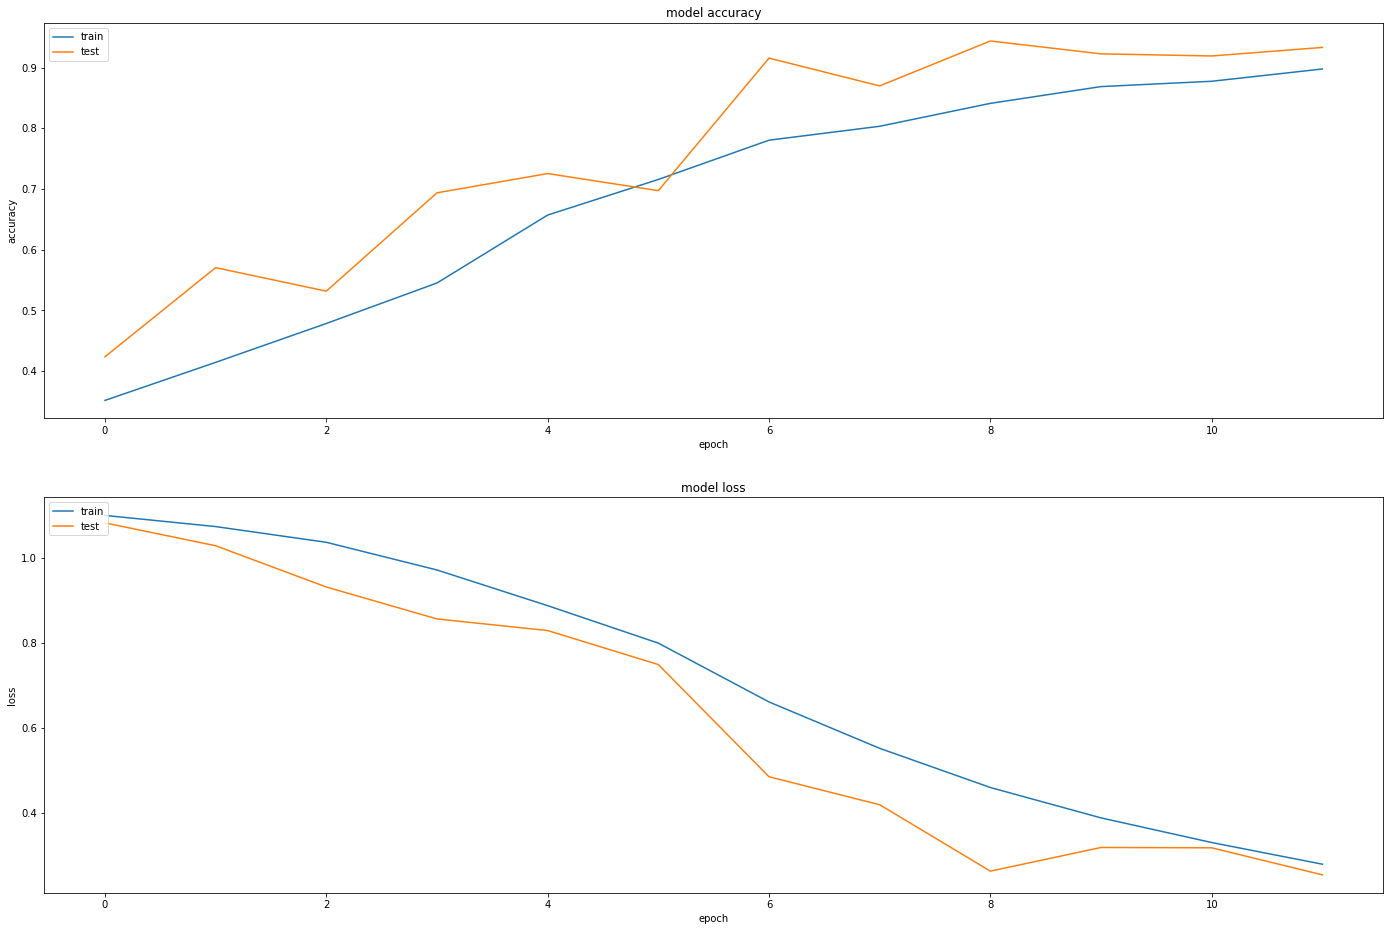

In [71]:
plt.figure(figsize=IMAGE_SIZE)

print(history)

# summarize history for accuracy
IMAGE_SIZE = (24, 16)
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()
    

In [85]:
def predict_image(image_path):
    orig = cv2.imread(image_path)
    image = load_img(image_path, target_size=(1066, 150))
    image = img_to_array(image)

    # important! otherwise the predictions will be '0'
    image = image / 255

    image = np.expand_dims(image, axis=0)
    pre = model.predict(image)

    pre = np.argmax(pre)
    router_classification_names = [item[13:-1] for item in sorted(glob.glob("./data/train/*/"))]

    label = router_classification_names[pre]
    cv2.putText(orig, "Predicted: {}".format(label), (10, 30),
                    cv2.FONT_HERSHEY_PLAIN, 1.5, (43, 99, 255), 2)

    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(orig)

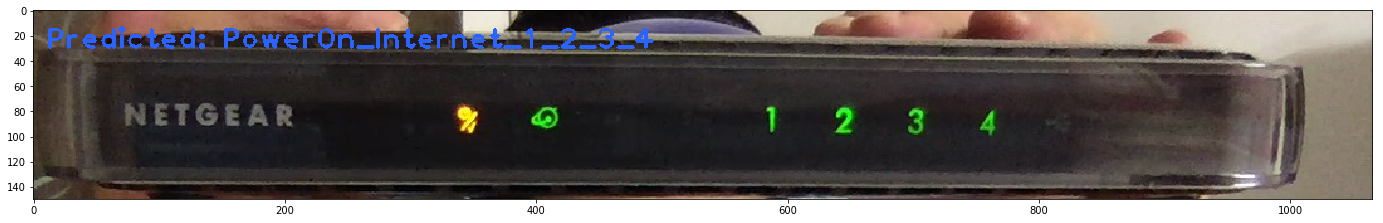

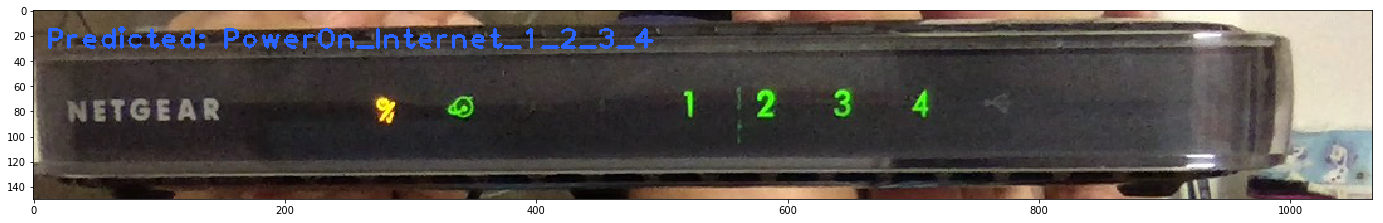

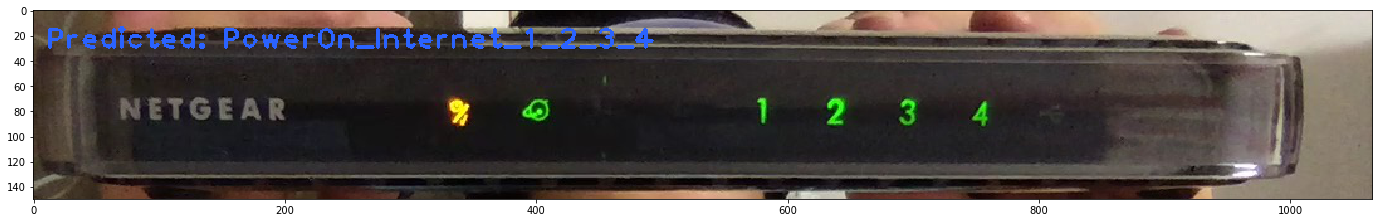

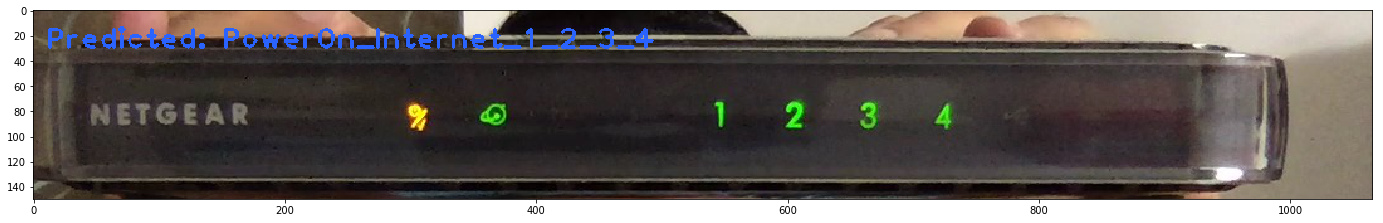

In [91]:
mylist = [f for f in glob.glob("./data/test/PowerOn_Internet_1_2_3_4/*.png")]
for i in [1,2,3,5] :
    predict_image(mylist[i])

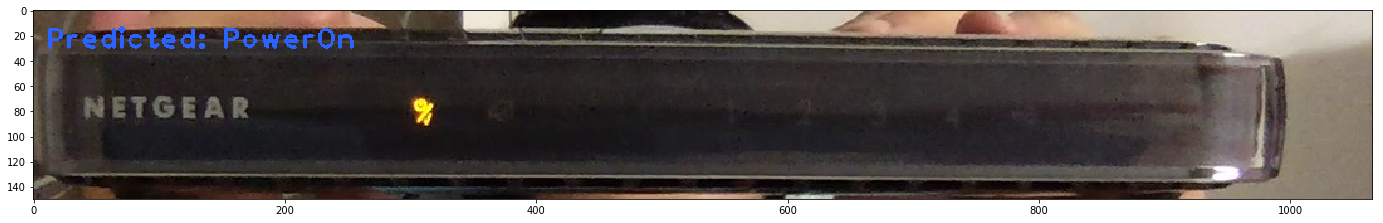

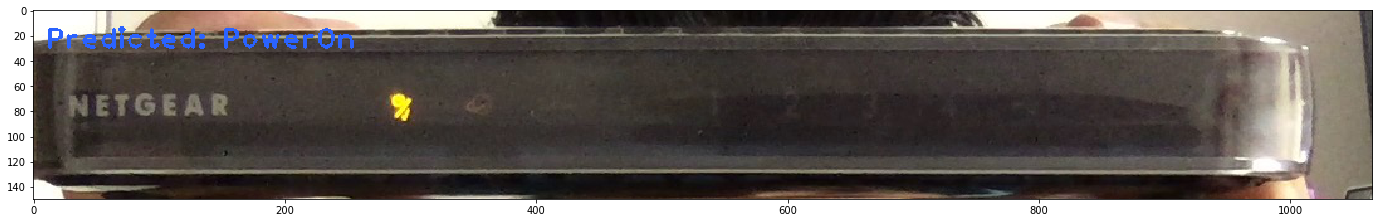

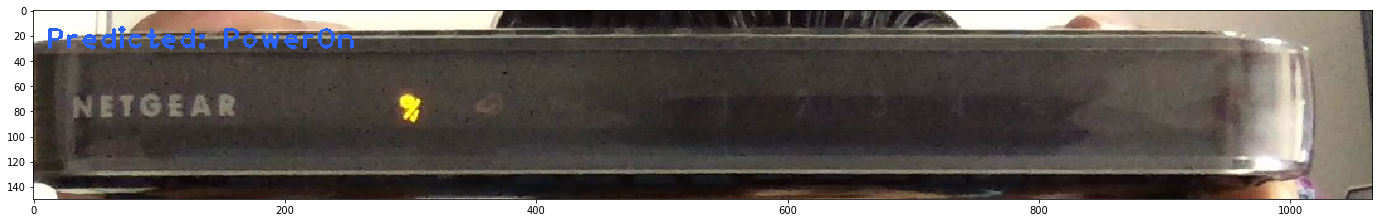

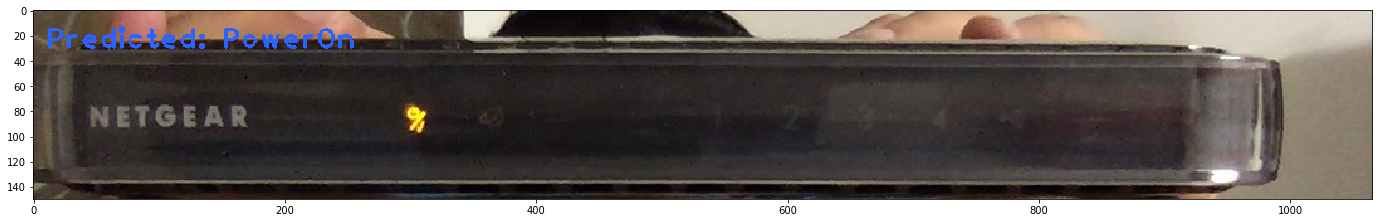

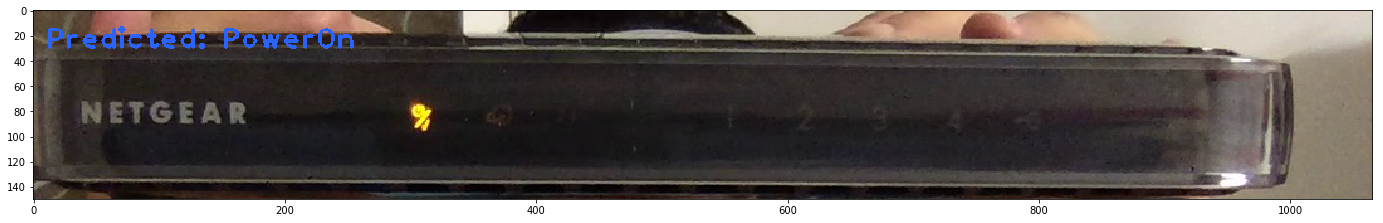

In [92]:
predict_image('./data/test/PowerOn/PowerOn__246939.png')
mylist = [f for f in glob.glob("./data/test/PowerOn/*.png")]
for i in [1,2,3,5] :
    predict_image(mylist[i])

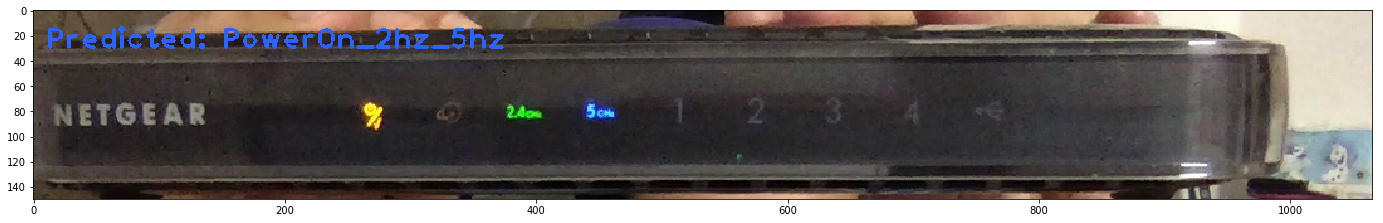

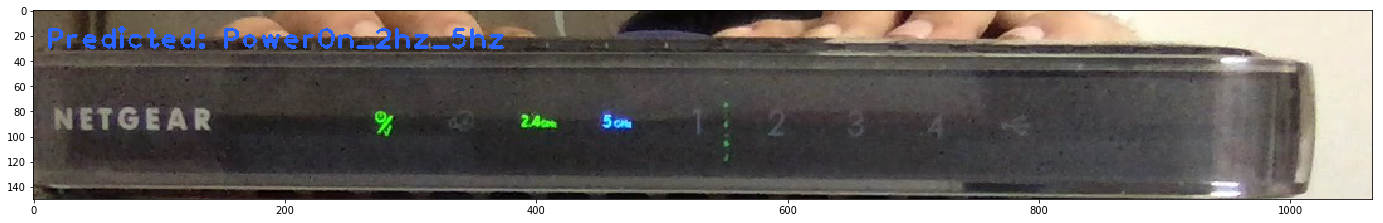

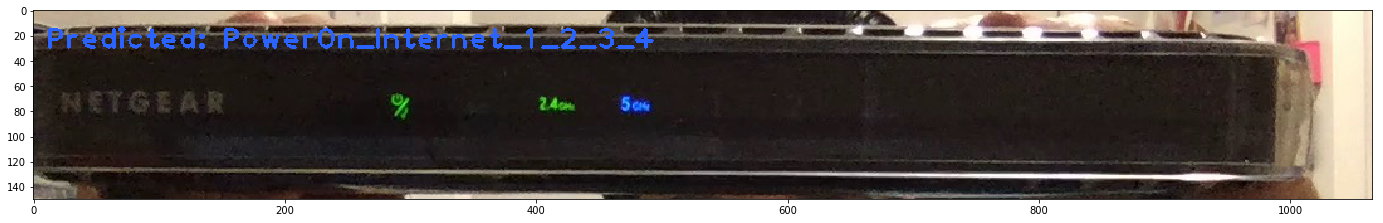

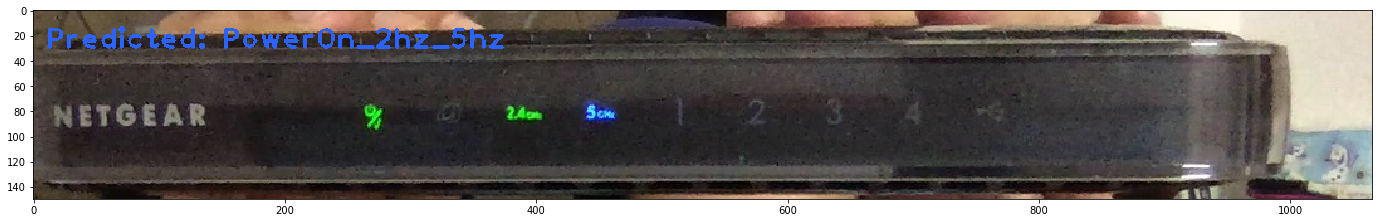

In [93]:
mylist = [f for f in glob.glob("./data/test/PowerOn_2hz_5hz/*.png")]

for i in [1,2,3,5] :
    predict_image(mylist[i])